# Tech Salary Analysis Project

# Import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("default")
sns.set_context('notebook')

# Load dataset

In [36]:
df=pd.read_csv(r"C:\\Users\\krise\\OneDrive\\Attachments\\Desktop\data.me\\Projects\\Tech Salary Analysis Project\\Salary_Dataset_DSL.csv")

In [37]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22739,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22740,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22741,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22742,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


# basic information

In [43]:
print(df.head())

   Rating                      Company Name          Job Title   Salary  \
0     3.8                            Sasken  Android Developer   400000   
1     4.5  Advanced Millennium Technologies  Android Developer   400000   
2     4.0                         Unacademy  Android Developer  1000000   
3     3.8                SnapBizz Cloudtech  Android Developer   300000   
4     4.4            Appoids Tech Solutions  Android Developer   600000   

   Salaries Reported   Location Employment Status Job Roles  
0                  3  Bangalore         Full Time   Android  
1                  3  Bangalore         Full Time   Android  
2                  3  Bangalore         Full Time   Android  
3                  3  Bangalore         Full Time   Android  
4                  3  Bangalore         Full Time   Android  


In [44]:
df.shape

(22744, 8)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22744 entries, 0 to 22743
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22744 non-null  float64
 1   Company Name       22743 non-null  object 
 2   Job Title          22744 non-null  object 
 3   Salary             22744 non-null  int64  
 4   Salaries Reported  22744 non-null  int64  
 5   Location           22744 non-null  object 
 6   Employment Status  22744 non-null  object 
 7   Job Roles          22744 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [46]:
print(df.describe())

             Rating        Salary  Salaries Reported
count  22744.000000  2.274400e+04       22744.000000
mean       3.918031  6.954445e+05           1.856138
std        0.519913  8.846838e+05           6.827435
min        1.000000  2.112000e+03           1.000000
25%        3.700000  3.000000e+05           1.000000
50%        3.900000  5.000000e+05           1.000000
75%        4.200000  9.000000e+05           1.000000
max        5.000000  9.000000e+07         361.000000


# Data Cleaning

In [47]:
print(df.isnull().sum())

Rating               0
Company Name         1
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64


In [55]:
df.dropna()



,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22739,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22740,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22741,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22742,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [56]:
print(df.isnull().sum())

Rating               0
Company Name         1
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64


In [101]:
# Shows rows that have any nulls
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)



       Rating Company Name                      Job Title   Salary  \
13744     4.0          NaN  Software Development Engineer  1188000   

       Salaries Reported   Location Employment Status Job Roles  
13744                  1  Bangalore         Full Time       SDE  


In [102]:
df = df.drop_duplicates()

# Outlier detection and Removal

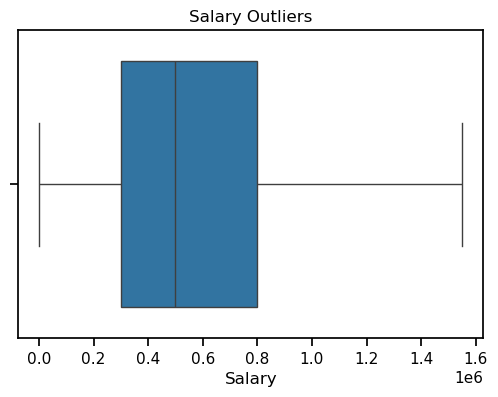

In [103]:
plt.figure(figsize=(6,4))      
sns.boxplot(x = df['Salary'])  

plt.title("Salary Outliers")   
plt.show()  

# IQR (Interquartile Range) Method

In [104]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

In [105]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [106]:
df = df[(df['Salary'] >= lower_limit) & (df['Salary'] <= upper_limit)]

In [107]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22739,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22740,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22741,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22742,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


# Univariate Analysis

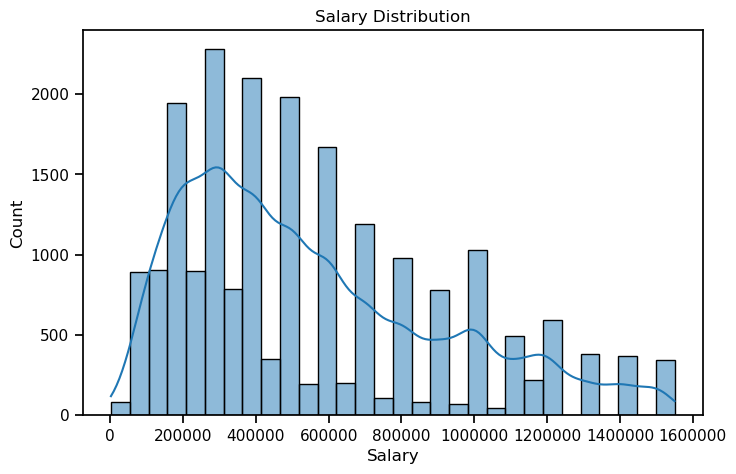

In [108]:
# salary distrubution
plt.figure(figsize=(8,5))
sns.histplot( df['Salary'], bins = 30, kde = True)
plt.ticklabel_format(style='plain', axis='x')
plt.title("Salary Distribution")    
plt.xlabel("Salary")
plt.ylabel("Count")  
plt.show()

# Answers Bussiness Questions

# 1.Which job roles usually get higher pay?

In [109]:
df['Job Roles'].nunique()

11

In [110]:
df['Job Roles'].unique()

array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

In [111]:
job_salary = df.groupby("Job Roles")['Salary'].mean().sort_values(ascending = False).head(10)
job_salary

Job Roles
Database    702694.679400
SDE         648451.882207
IOS         593214.068241
Mobile      588380.952381
Backend     528714.533971
Frontend    502100.242007
Android     483388.868327
Java        475856.702703
Testing     464824.757895
Python      449531.694295
Name: Salary, dtype: float64

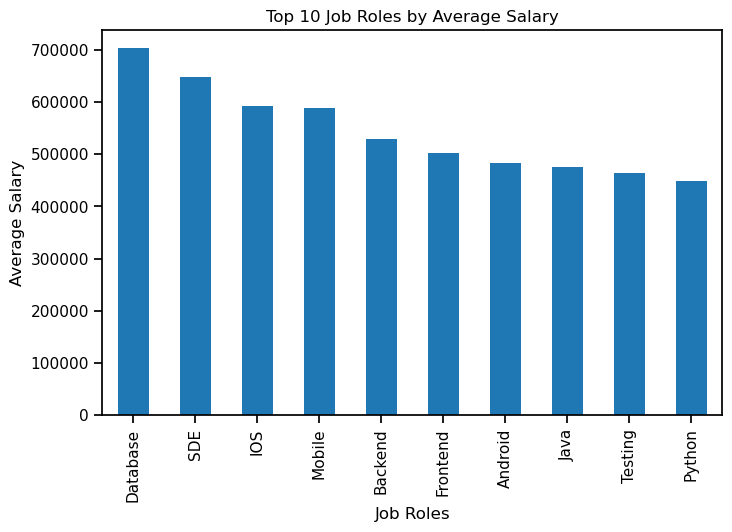

In [150]:
plt.figure(figsize = (8,5))
job_salary.plot(kind = 'bar')                     # bar chart
plt.title("Top 10 Job Roles by Average Salary")
plt.ylabel("Average Salary")
plt.show()

# Which cities pay better on average?

In [113]:
city_salary = df.groupby('Location')['Salary'].mean().sort_values(ascending = False)
city_salary

Location
Mumbai            702360.529968
Jaipur            571168.831169
Bangalore         568223.064879
Pune              562166.900856
New Delhi         543064.166413
Hyderabad         538891.643411
Kolkata           531875.776398
Kerala            514965.735849
Chennai           505015.996591
Madhya Pradesh    497530.378378
Name: Salary, dtype: float64

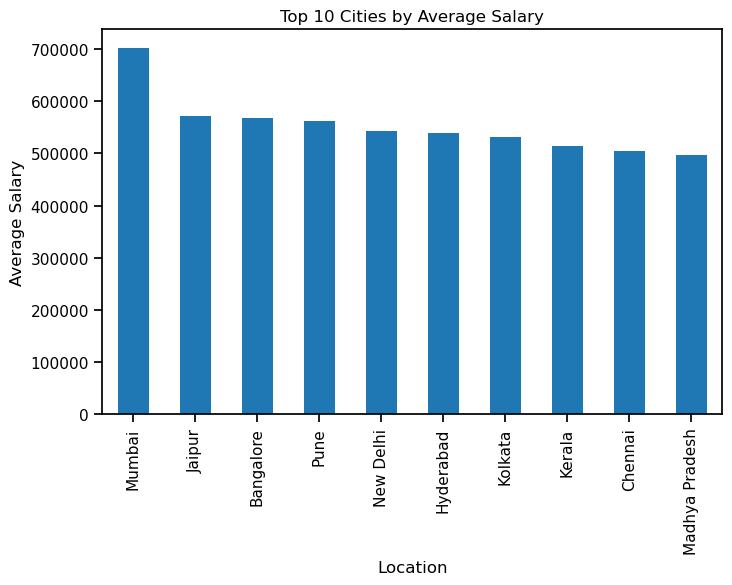

In [116]:
plt.figure(figsize = (8,5))
city_salary.plot(kind = 'bar')                
plt.title("Top 10 Cities by Average Salary")
plt.ylabel("Average Salary")
plt.show()

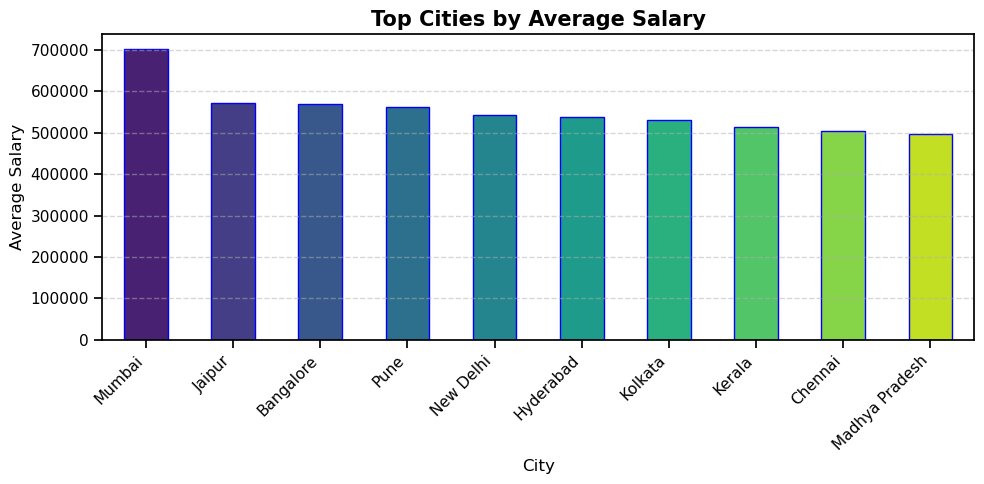

In [117]:
plt.figure(figsize=(10,5))
colors = sns.color_palette("viridis", len(city_salary))       
city_salary.plot(kind="bar", color=colors, edgecolor="blue") 
plt.title("Top Cities by Average Salary", fontsize=15, fontweight="bold")
plt.xlabel("City")
plt.ylabel("Average Salary")
plt.xticks(rotation=45, ha="right")                   
plt.grid(axis="y", linestyle="--", alpha=0.5)                 
plt.tight_layout()                                             
plt.show()

# Name those 5 companies located in 'New Delhi' with Ratings of '5', offering highest & lowest salaries.

In [118]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22739,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22740,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22741,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22742,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [120]:
df1 = df[(df['Location'] == 'New Delhi') & (df['Rating'] == 5)].sort_values(by = "Salary", ascending = False)
df1

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
6744,5.0,Hapramp,Front End Developer,1500000,1,New Delhi,Full Time,Frontend
1887,5.0,Trillbit,Android Developer,1500000,1,New Delhi,Full Time,Android
17465,5.0,The Art of Mike Mignola,Software Development Engineer,1500000,1,New Delhi,Full Time,SDE
8278,5.0,Silicon Valley Recycling,Senior IOS Developer,1400000,1,New Delhi,Full Time,IOS
17330,5.0,Parth Universal,Software Development Engineer,1300000,1,New Delhi,Full Time,SDE
...,...,...,...,...,...,...,...,...
1722,5.0,Neo Fitnes,Android Developer,100000,1,New Delhi,Full Time,Android
1968,5.0,WorkingNation,Android Developer - Intern,84000,1,New Delhi,Intern,Android
2333,5.0,Hopin (India),Android Developer - Intern,60000,1,New Delhi,Intern,Android
17501,5.0,Star Catalysts,Software Development Engineer - Intern,60000,1,New Delhi,Intern,SDE


In [121]:
list(df1['Company Name'].head())

['Hapramp',
 'Trillbit',
 'The Art of Mike Mignola',
 'Silicon Valley Recycling',
 'Parth Universal']

In [122]:
list(df1['Company Name'].tail())

['Neo Fitnes', 'WorkingNation', 'Hopin (India)', 'Star Catalysts', 'Atom 8']

 # Which Job Title has the highest number of salary reported?

In [123]:
df['Job Title'].value_counts()

Job Title
Software Development Engineer          2134
Android Developer                      1982
Software Development Engineer (SDE)    1475
Front End Developer                    1359
Test Engineer                          1290
                                       ... 
Mobile Tester                             1
Lead Front-End Developer                  1
Full Stack Mobile Developer               1
Front End Designer - Intern               1
Associate Web Developer                   1
Name: count, Length: 979, dtype: int64

In [124]:
df.groupby('Job Title')['Salaries Reported'].count().sort_values(ascending = False)

Job Title
Software Development Engineer          2134
Android Developer                      1982
Software Development Engineer (SDE)    1475
Front End Developer                    1359
Test Engineer                          1290
                                       ... 
Lead Software Test Engineer               1
Lead, IOS Team                            1
Level II Mobile Technician                1
MACH Software Development Engineer        1
Xamarin Mobile Developer                  1
Name: Salaries Reported, Length: 979, dtype: int64

# Which 10 Companies provide the highest average salary, when at least 20 employees have reported their salaries?

In [126]:
filtered_df = df[df['Salaries Reported'] >= 20]
filtered_df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
8783,3.9,Tata Consultancy Services,Java Developer,200000,30,Chennai,Full Time,Java
8970,3.8,Cognizant Technology Solutions,Senior Java Developer,200000,35,Chennai,Full Time,Java
8971,3.9,Tata Consultancy Services,Senior Java Developer,300000,30,Chennai,Full Time,Java
8972,3.9,Tata Consultancy Services,Junior Java Developer,200000,30,Chennai,Full Time,Java
9680,3.9,Tata Consultancy Services,Java Developer,200000,43,Hyderabad,Full Time,Java
...,...,...,...,...,...,...,...,...
21737,3.8,CGI,Senior Test Engineer,400000,21,Bangalore,Full Time,Testing
21738,4.1,IBM,Test Automation Engineer,400000,21,Bangalore,Full Time,Testing
21739,3.7,SLK Group,Software Test Engineer,300000,20,Bangalore,Full Time,SDE
21740,4.3,Cisco Systems,Software Test Engineer,700000,20,Bangalore,Full Time,SDE


In [127]:
filtered_df.groupby('Company Name')['Salary'].mean().sort_values(ascending = False).head(10)

Company Name
Expedia Group     1.350000e+06
Nokia             1.200000e+06
Amadeus           1.200000e+06
Ola               1.000000e+06
Alcatel-Lucent    1.000000e+06
Lumen             9.000000e+05
Kony              9.000000e+05
Microsoft         7.845714e+05
Cisco Systems     7.000000e+05
McAfee            6.500000e+05
Name: Salary, dtype: float64

# Check and show the relationship Between Ratings & Salaries.

In [128]:
df.corr(numeric_only=True)

,Rating,Salary,Salaries Reported
Rating,1.000000,0.024912,-0.013511
Salary,0.024912,1.000000,-0.021633
Salaries Reported,-0.013511,-0.021633,1.000000


In [129]:
df['Rating'].corr(df['Salary'])

0.02491197264872807

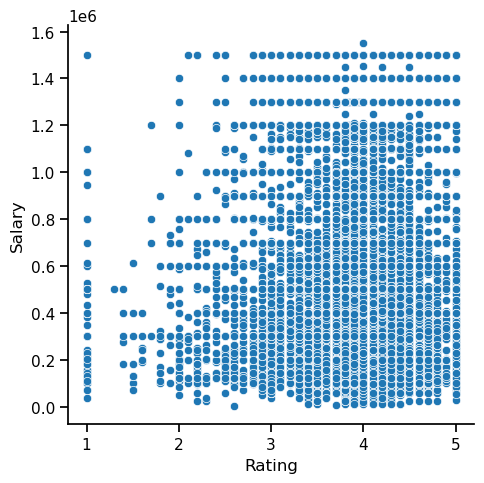

In [130]:
sns.relplot(x = 'Rating', y = 'Salary', data = df)
plt.show()

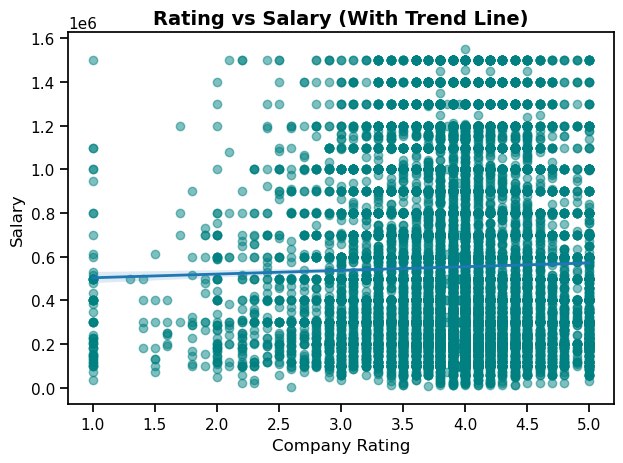

In [131]:
sns.regplot(x="Rating", y="Salary", data=df, scatter_kws={"alpha": 0.5, "color": "teal"}, line_kws={"linewidth": 2})
plt.title("Rating vs Salary (With Trend Line)", fontsize=14, fontweight="bold")
plt.xlabel("Company Rating")
plt.ylabel("Salary")
plt.tight_layout()              
plt.show()

# Does employment status affect salary?

In [132]:
df['Employment Status'].unique()

array(['Full Time', 'Intern', 'Contractor', 'Trainee'], dtype=object)

In [133]:
df['Employment Status'].value_counts()

Employment Status
Full Time     18359
Intern         2085
Contractor      513
Trainee          33
Name: count, dtype: int64

In [139]:
df.groupby("Employment Status")['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Employment Status,,,,,,,,
Contractor,513.0,501507.586745,315663.813209,12000.0,300000.0,400000.0,600000.0,1500000.0
Full Time,18359.0,579345.086769,358086.351529,8448.0,300000.0,500000.0,800000.0,1550000.0
Intern,2085.0,338370.977458,264303.724937,2112.0,144000.0,264000.0,456000.0,1500000.0
Trainee,33.0,324303.030303,241096.516572,96000.0,144000.0,240000.0,400000.0,1100000.0


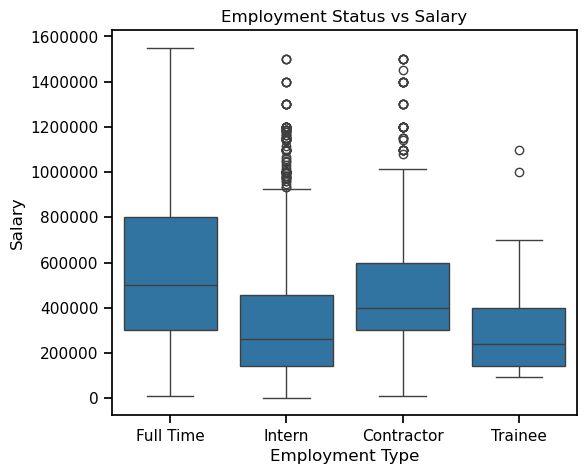

In [140]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Employment Status", y="Salary", data=df)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.title("Employment Status vs Salary", fontsize = 12)
plt.xlabel("Employment Type")
plt.ylabel("Salary")
plt.show()

# Most common job roles

In [141]:
df['Job Roles'].value_counts()

Job Roles
SDE         7233
Android     2810
Frontend    2033
Java        1776
Testing     1710
IOS         1524
Backend     1045
Web          987
Python       929
Database     733
Mobile       210
Name: count, dtype: int64

In [143]:
top_roles = df['Job Roles'].value_counts().head(10)
top_roles

Job Roles
SDE         7233
Android     2810
Frontend    2033
Java        1776
Testing     1710
IOS         1524
Backend     1045
Web          987
Python       929
Database     733
Name: count, dtype: int64

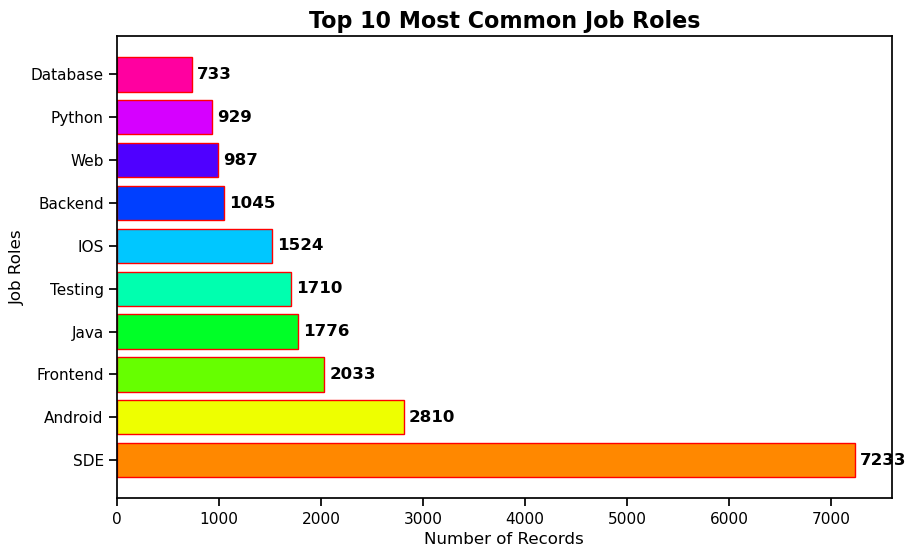

In [144]:
plt.figure(figsize = (10,6))
colors = sns.color_palette("hsv", len(top_roles))
plt.barh(top_roles.index, top_roles.values, color = colors, edgecolor = 'red')
for i, v in enumerate(top_roles.values):
    plt.text(v + 50, i, str(v), va = 'center', fontweight = 'bold')
plt.title("Top 10 Most Common Job Roles", fontsize=16, fontweight="bold")
plt.xlabel("Number of Records", fontsize=12)
plt.ylabel("Job Roles", fontsize=12)
plt.show()

# How salary changes with company rating

In [145]:
rating_salary = df.groupby('Rating')['Salary'].mean().reset_index()
rating_salary.head()

,Rating,Salary
0,1.0,399971.500000
1,1.3,500000.000000
2,1.4,331200.000000
3,1.5,241000.000000
4,1.6,262285.714286


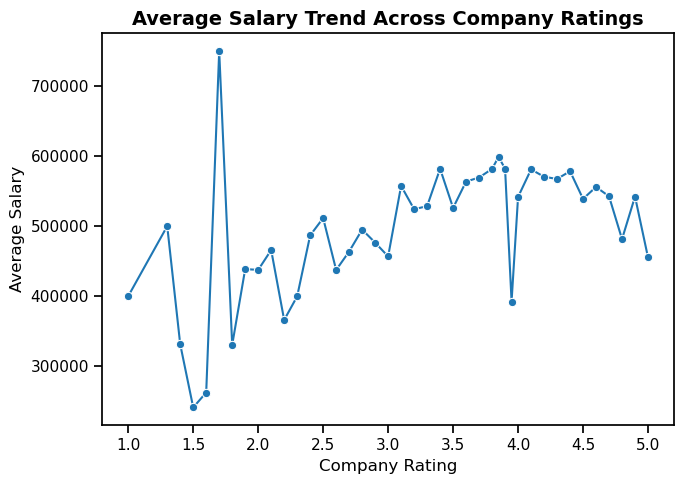

In [146]:
plt.figure(figsize = (7,5))
sns.lineplot(x = 'Rating', y = 'Salary', data = rating_salary, marker = 'o' )           
plt.title("Average Salary Trend Across Company Ratings", fontsize=14, fontweight="bold")
plt.xlabel("Company Rating")
plt.ylabel("Average Salary")
plt.tight_layout()                    
plt.show()

# Mini Dashboard

In [147]:
# Prepare data
rating_salary = df.groupby('Rating')['Salary'].mean().reset_index()
top_locations = df.groupby('Location')['Salary'].mean().sort_values(ascending = False)

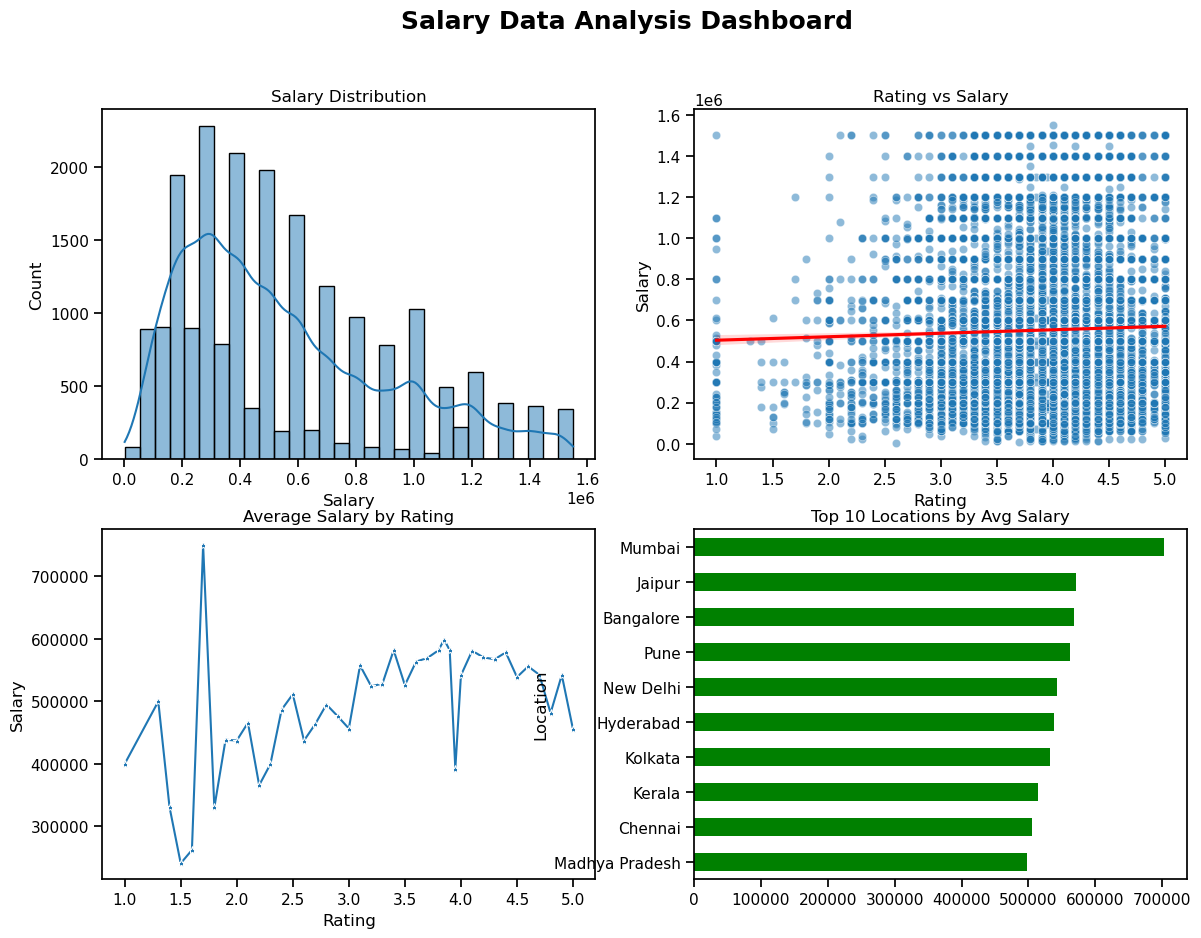

In [148]:
# Create Dashboard Layout
plt.figure(figsize=(14,10))

#1. Salary Distribution
plt.subplot(2,2,1)
sns.histplot(df['Salary'], bins = 30, kde=True)
plt.title("Salary Distribution")

#2. Rating vs Salary
plt.subplot(2,2,2)
sns.scatterplot(x="Rating", y='Salary', data=df, alpha=0.5)
sns.regplot(x = 'Rating', y = 'Salary', data = df, scatter = False, color = 'red')
plt.title("Rating vs Salary")

#3. Average Salary by Rating
plt.subplot(2,2,3)
sns.lineplot(x='Rating', y='Salary', data = rating_salary, marker = '*')
plt.title("Average Salary by Rating")

#4. Top Locations
plt.subplot(2,2,4)
top_locations.sort_values().plot(kind='barh', color='green')
plt.title("Top 10 Locations by Avg Salary")

plt.suptitle("Salary Data Analysis Dashboard", fontsize=18, fontweight = 'bold')
plt.show()